In [2]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def Mix(char1, char2):
    char1_file = 'Images/'+char1+'256.png'
    char1_amplitude, char1_ang = Spectrum_Phase(char1_file)
    
    char2_file = 'Images/'+char2+'256.png'
    char2_amplitude, char2_ang = Spectrum_Phase(char2_file)
    
    char1_char1 = to_image(char1_amplitude, char1_ang)
    char2_char2 = to_image(char2_amplitude, char2_ang)
    char1_char2 = to_image(char1_amplitude, char2_ang)
    char2_char1 = to_image(char2_amplitude, char1_ang)
    
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("スペクトルは"+char1+", 位相は"+char1+"です")
    plt.imshow(char1_char1, cmap="gray")
    plt.show()
    
    print("スペクトルは"+char2+", 位相は"+char2+"です")
    plt.imshow(char2_char2, cmap="gray")
    plt.show()   
    
    
    print("スペクトルは"+char1+", 位相は"+char2+"です")
    plt.imshow(char1_char2, cmap="gray")
    plt.show()
    
    print("スペクトルは"+char2+", 位相は"+char1+"です")
    plt.imshow(char2_char1, cmap="gray")
    plt.show()
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    
# パワースペクトルを出力する
def Spectrum_Phase(filename):
    """
        filename：入力画像
    """
    
    # 画像を読み込む
    img = Image.open(filename)
    # グレイスケールに変換する
    gray_img = img.convert('L')
    # NumPy 配列にする
    f_xy = np.asarray(gray_img)

    # 2 次元高速フーリエ変換で周波数領域の情報を取り出す
    f_uv = np.fft.fft2(f_xy)
    # 画像の中心に低周波数の成分がくるように並べかえる
    shifted_f_uv = np.fft.fftshift(f_uv)

    # パワースペクトルに変換する
    amplitude = np.absolute(shifted_f_uv)
    ang = np.angle(shifted_f_uv)

    return amplitude, ang

def to_image(amplitude, ang):
    unshifted_amplitude = np.fft.fftshift(amplitude)
    unshifted_ang = np.fft.fftshift(ang)

    same_as_f = unshifted_amplitude * (np.cos(unshifted_ang) + np.sin(unshifted_ang) * 1j)

    # 2 次元逆高速フーリエ変換で空間領域の情報に戻す
    i_f_xy = np.fft.ifft2(same_as_f).real  # 実数部だけ使う
    
    return i_f_xy

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
スペクトルはB, 位相はBです


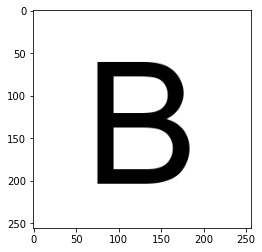

スペクトルはA, 位相はAです


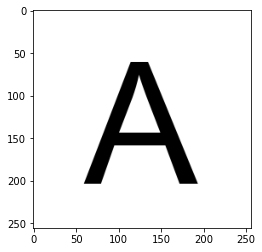

スペクトルはB, 位相はAです


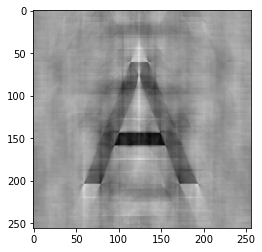

スペクトルはA, 位相はBです


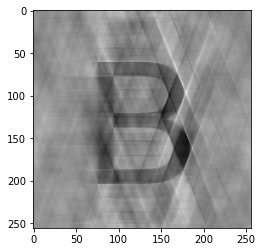

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [6]:
## A~Iまでの名前を選択．
Mix('B', 'A')